### Beyond CAPM:
<br>
-  CAPM is a single-factor model

> R<sub>i</sub>' = α<sub>i</sub> + β<sub>i</sub>R<sub>M</sub>' + ε<sub>i</sub>

- Fama and French 3-factor model

> R<sub>i</sub>' = α<sub>i</sub> + β<sub>1</sub>R<sub>M</sub>' +  β<sub>2</sub>(SMB) +  β<sub>3</sub>(HML) + ε<sub>i</sub>

- Statistical factor models (PCA, Factor Analysis - Unsupervised ML)

> R<sub>i</sub>' = α<sub>i</sub> + β<sub>1</sub>f<sub>1</sub> + β<sub>2</sub>f<sub>2</sub> + β<sub>k</sub>f<sub>k</sub> + ε<sub>i</sub>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sp500_closefull.csv', index_col='Date', parse_dates=True)
df.dropna(axis=1, thresh=len(df) - 10, inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df = df.copy()
df.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.77,3.64375,238.919998,29.534695


In [3]:
df.shape

(2270, 430)

In [4]:
df.isna().sum().sum()

0

In [5]:
all_dates = df.index.unique().sort_values()
start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2017-06-30')
dates = all_dates[start:end + 1]
returns = pd.DataFrame(index=all_dates[1:])

In [8]:
for name in df.columns:
    current_returns = np.log(df[name]).diff().copy()
    returns[name] = current_returns.iloc[1:]

In [7]:
returns.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,...,-0.011793,-0.004286,-0.003333,-0.013723,0.046560,-0.006793,-0.005939,0.029476,0.004308,-0.013019
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,...,0.014134,-0.001746,-0.010067,0.001808,0.036075,-0.004555,0.017711,0.021889,-0.020832,0.002182
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,...,0.022551,-0.004447,-0.013583,0.004260,0.013536,-0.001777,0.028207,-0.011911,0.010934,-0.009698
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,...,-0.033133,0.001485,0.009075,0.000817,-0.018454,0.024841,-0.003166,-0.002056,0.007014,-0.003149
2010-01-11,-0.002843,-0.016642,0.007025,0.007513,0.043001,0.027783,-0.013757,0.000000,-0.011921,0.028123,...,-0.017890,-0.006766,-0.025738,0.019735,-0.001645,0.026414,-0.010838,-0.002060,0.016150,0.012847


In [8]:
X = returns.to_numpy()

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X.shape

(2269, 430)

In [11]:
from sklearn.decomposition import PCA
model = PCA()
Z = model.fit_transform(X)

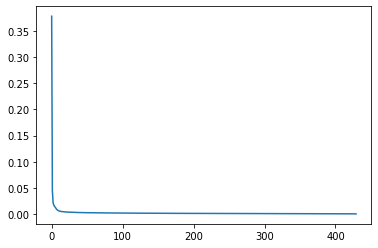

In [12]:
plt.plot(model.explained_variance_ratio_)
plt.show()

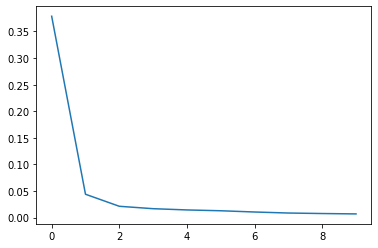

In [13]:
plt.plot(model.explained_variance_ratio_[:10])
plt.show()

<code>'explained_variance_ratio_'</code> shows us the percentage of variance explained by each of the selected components.
Most of the variance can be explained by first ten principle components.

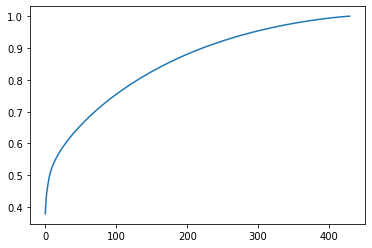

In [14]:
# Comulative Variance
cumulative_variance = np.cumsum(model.explained_variance_ratio_)
plt.plot(cumulative_variance)
plt.show()

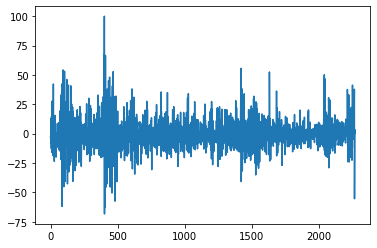

In [15]:
# Plot first principal component vs S&P
plt.plot(Z[:, 0])
plt.show()

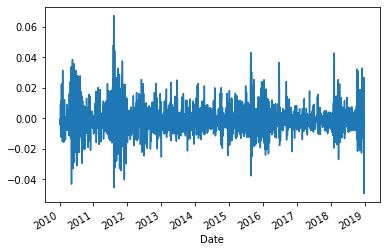

In [16]:
spy = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)
spy_returns = -np.log(spy['Close']).diff().dropna()
spy_returns.plot()
plt.show()

In [17]:
Z_df = pd.DataFrame(index=returns.index)
Z_df['PC1'] = Z[:, 0]
joined = Z_df.join(spy_returns)
joined.columns = ['PC1', 'SPY']
joined.head()

,PC1,SPY
Date,,
2010-01-05,-3.082268,-0.002644
2010-01-06,-1.658736,-0.000704
2010-01-07,-7.838046,-0.004212
2010-01-08,-3.300012,-0.003322
2010-01-11,-3.664966,-0.001396


<AxesSubplot:xlabel='Date'>

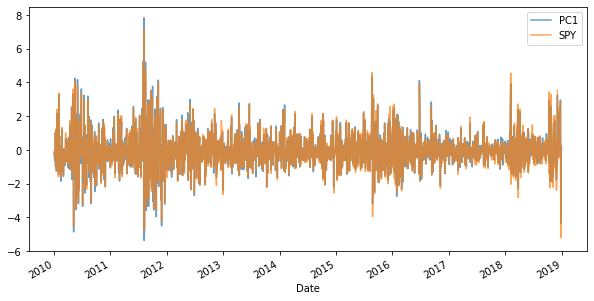

In [18]:
scaler2 = StandardScaler()
joined[['PC1', 'SPY']] = scaler2.fit_transform(joined)
joined.plot(figsize=(10, 5), alpha=.7)

The returns of the first principle component highly matches the returns of SPY. This make sense in terms of CAPM, which states that there's a one major factor that influences all stock prices (market). We found that one major factor with PCA.